# Ejercicio 1 (2 puntos)

Realiza una análisis de componentes principales (PCA) utilizando el conjunto de datos proporcionado en el archivo 'diabetes.csv'. El análisis se realizará mediante una implementación con NumPy (sin utilizar librerías específicas de PCA). Deberás calcular, usando las dos primeras componentes principales:

- La matriz de pesos, W.

- Las proyecciones, X', incluyendo su representación gráfica etiquetada según su categoría.

- Los ratios de varianza explicada, incluyendo su representación gráfica para la primera componente principal.

---

# Configuración y Visualización del Entorno

## Configuración de las Rutas de Importación

Se añade el directorio padre (..) al path (sys.path), lo que permite al entorno de Python acceder a módulos o paquetes ubicados en directorios superiores al actual. Esto es útil para poder importar scripts o paquetes personalizados sin tener que mover ficheros o el directorio de trabajo.

In [67]:
import sys
sys.path.insert(0, '..')

## Verificación de las Versiones de los Paquetes

Se utiliza la función check_packages() para verificar que los paquetes y sus respectivas versiones indicadas en el diccionario 'd' estén instalados correctamente dentro del entorno. Este paso es importante para verificar la compatibilidad de cada paquete para poder evitar errores por diferencia de versión.

In [68]:
from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] numpy 1.26.4
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


## Importación de Paquetes

Se importan los paquetes esenciales para analizar y visualizar datos: numpy para cálculos numéricos, pandas para manipular datos y matplotlib.pyplot para visualizar gráficos, entre otros.

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

---

# Código Fuente

In [70]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [71]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Como se puede observar, el dataset está compuesto por 8 características y un resultado binario (0 o 1) para saber si se tiene o no diabetes.

**PASO 1: Estandarización del dataset**

Se estandarizan los datos para que cada característica tenga media 0 y desviación estándar 1.

In [72]:
X, y = df.iloc[:, 0:-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y, 
                     random_state=0)
# standarize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

**PASO 2: Construcción de la matriz de covarianza**

La matriz de covarianza tiene dimensiones d x d (8 x 8 en este caso).

In [73]:
cov_mat = np.cov(X_train_std.T)

**PASO 3: Descomposición en valores y vectores propios**

Los valores propios (eigenvalues) indican la cantidad de varianza explicada por cada componente principal. 

Los vectores propios (eigenvectors) muestran la dirección de las nuevas componentes principales.

In [74]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)
print('\nEigenvectors \n', eigen_vecs)


Eigenvalues 
 [2.04241039 1.71892202 1.07478574 0.42789489 0.43955938 0.68393485
 0.78361637 0.84380173]

Eigenvectors 
 [[ 0.00514388  0.60738529  0.04892714 -0.54543869 -0.24263154 -0.12310134
  -0.50606056 -0.03221997]
 [-0.3616968   0.23503771  0.44151749 -0.29751184  0.26650004 -0.22971075
   0.54924091  0.32407844]
 [-0.30829658  0.2532715  -0.55726837 -0.18451283 -0.14879068  0.56928806
   0.38254228 -0.0603953 ]
 [-0.49021487 -0.22862843 -0.22066072 -0.14876282  0.63697598  0.0623073
  -0.46695523  0.094494  ]
 [-0.45779243 -0.15405324  0.36904988  0.22094845 -0.50547593  0.33407013
  -0.2555237   0.38636322]
 [-0.46655972 -0.00366779 -0.38329324  0.21472109 -0.32282246 -0.68646215
   0.05088583 -0.10609307]
 [-0.31228594 -0.11944703  0.38986762 -0.09813178 -0.02926588  0.11145186
   0.03756352 -0.84373827]
 [-0.09495882  0.64916063  0.09121936  0.67324199  0.2857514   0.09409195
  -0.09251276 -0.09450811]]


In [75]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [500 268]
Labels counts in y_train: [350 187]
Labels counts in y_test: [150  81]


**PASO 4: Ordenación de los valores propios en orden decreciente para clasificar los vectores propios**

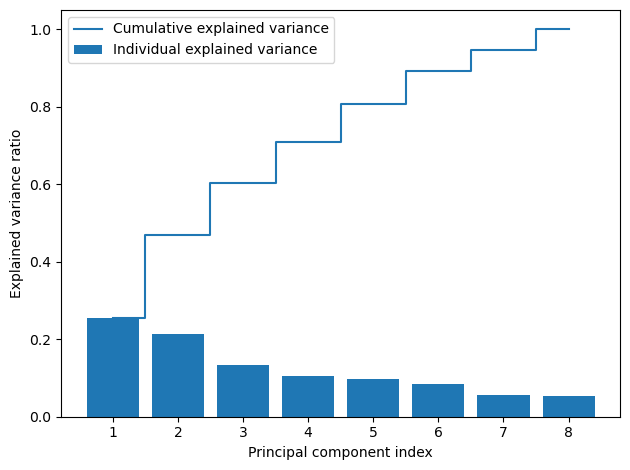

In [76]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in 
           sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,9), var_exp, align='center', 
        label='Individual explained variance')
plt.step(range(1,9), cum_var_exp, where='mid', 
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Como se puede observar, este gráfico muestra la varianza de cada componente y su varianza acumulada. 

En este caso, las dos primeras componentes comprenden, aproximadamente, el 50% de la varianza, lo que sugiere que gran parte de la información de los datos originales se encuentra en esas componentes, por lo que convendría reducir el dataset a 2 dimensiones.

**PASO 5: Selección de los vectores propios respecto a los valores propios más grandes**

Se seleccionan los primeros k vectores propios (en este caso, k=2), eligiendo aquellas componentes que más información conserven del dataset original, lo que ayuda a reducir la dimensionalidad del dataset de una forma más efectiva.

In [77]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) 
               for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

**PASO 6: Construcción de la matriz de pesos (o de proyección)**

Se crea la matriz de pesos (o de proyección) W usando los vectores propios seleccionados anteriormente, la cual se utilizará para transformar los datos originales en el nuevo espacio de características reducido.

In [78]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.00514388  0.60738529]
 [-0.3616968   0.23503771]
 [-0.30829658  0.2532715 ]
 [-0.49021487 -0.22862843]
 [-0.45779243 -0.15405324]
 [-0.46655972 -0.00366779]
 [-0.31228594 -0.11944703]
 [-0.09495882  0.64916063]]


Como se puede observar, la matriz de pesos (o de proyección) W es de tamaño d x k (8 x 2 en este caso), donde los valores de W obtenidos representan las direcciones de las k componentes principales más importantes, lo que facilita la proyección del dataset a un subespacio de menor dimensionalidad.

**PASO 7: Transformación del dataset mediante la matriz de pesos (o de proyección)**

Se utiliza la matriz de pesos (o de proyección) W para proyectar los datos originales en un espacio de menor dimensión.

In [79]:
X_train_std[0].dot(w)

array([-0.02618098,  1.72367529])

En este snippet de código, el conjunto de datos proyectado (X_train_pca) se ha convertido en una versión reducida de X_train_std, donde se han mantenido las k componentes principales. 

Este subespacio mantiene una gran parte de la información que tenía inicialmente, lo que permite visualizar y clasificar los datos de una forma más efectiva.

In [80]:
X_train_pca = X_train_std.dot(w)

**Visualización del nuevo espacio de características**

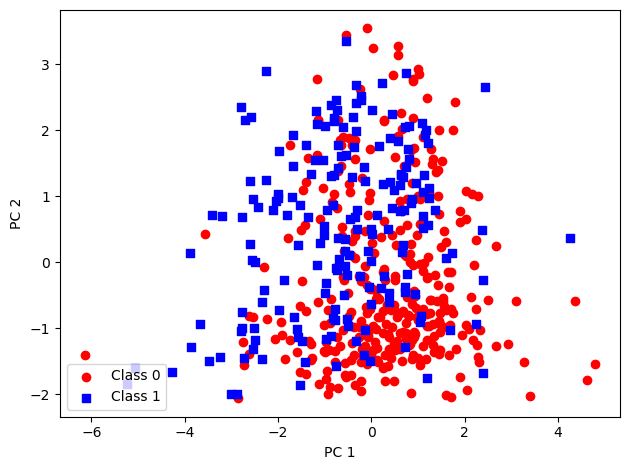

In [81]:
colors = ['r', 'b']
markers = ['o', 's']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Como se puede observar, el gráfico resultante muestra la separación de cada clase en función de las k componentes principales.

Si se muestra una clara separación de las clases, se sugiere que PCA ha capturado bien las características discriminativas. En este caso, no se tiene una separación perfecta pero se pueden distinguir las componentes de una clase respecto a la otra.

**Clasificación y visualización de las regiones de decisión**

In [82]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

Este snippet de código entrena un clasificador de Regresión Logística en los datos proyectados y visualiza las regiones de decisión en el espacio reducido.

/home/aalberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


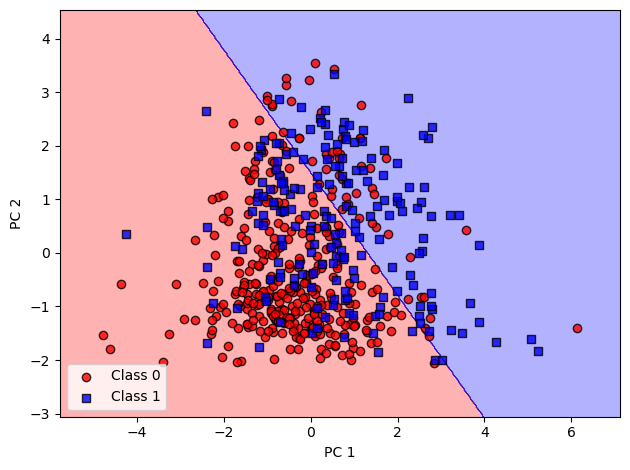

In [83]:
# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', 
                        random_state=1, 
                        solver='lbfgs')
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

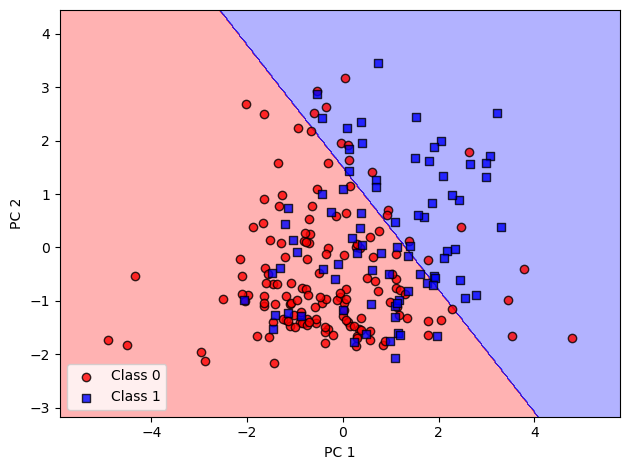

In [84]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

**Cálculo del radio de varianza explicado (explained variance ratio)**

In [85]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.25482588, 0.21446513, 0.13409803, 0.1052788 , 0.09776964,
       0.08533265, 0.0548426 , 0.05338726])

**Carga de las componentes principales**

Las cargas cercanas a 1 o -1 indican qué características tienen una fuerte relación con cada una de las componentes principales, lo que permite interpretar qué variables originales tienen más influencia en cada componente.

En este caso, dichas variables son SkinThickness, Insulin y BMI para la primera componente (PC 1) y Pregnancies y Age para la segunda componente (PC 2).

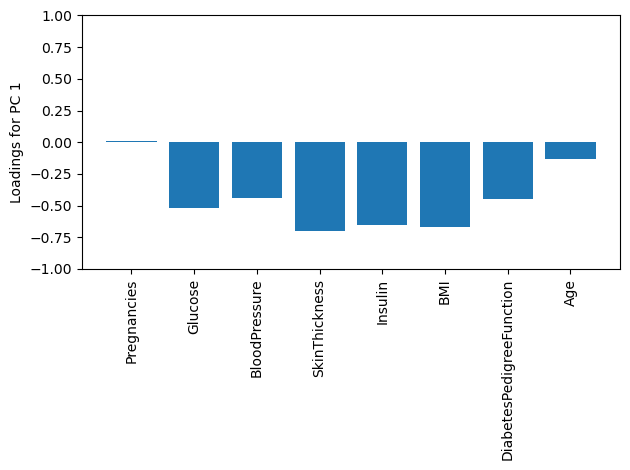

In [86]:
loadings = eigen_vecs * np.sqrt(eigen_vals)
fig, ax = plt.subplots()
ax.bar(range(8), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(8))
ax.set_xticklabels(df.columns[:-1], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

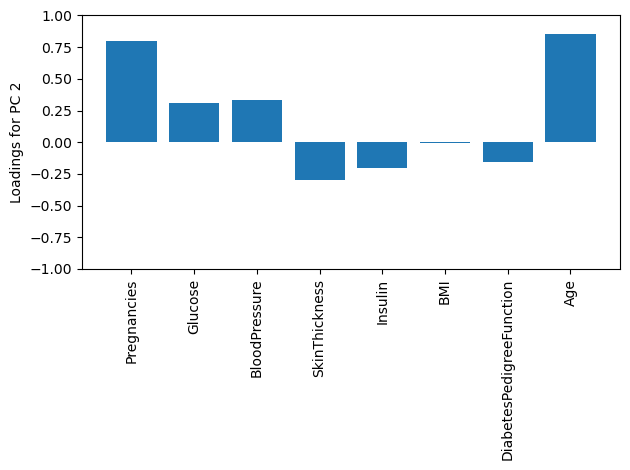

In [87]:
fig, ax = plt.subplots()
ax.bar(range(8), loadings[:, 1], align='center')
ax.set_ylabel('Loadings for PC 2')
ax.set_xticks(range(8))
ax.set_xticklabels(df.columns[:-1], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

---

# Convertir Jupyter Notebook a Fichero Python

In [88]:
! python .convert_notebook_to_script.py --input answer1.ipynb --output answer1.py

[NbConvertApp] Converting notebook answer1.ipynb to script
[NbConvertApp] Writing 10620 bytes to answer1.py
